Asumsikan kamu merupakan Data Scientist departemen sumber daya manusia atau Human Resource Department (HRD) dari perusahaan yang bergerak di bidang marketplace bernama TokoLapak. Perusahaan ini memiliki karyawan yang tersebar di Jabodetabek (Jakarta, Kota Bogor, Kabupaten Bogor, Kota Depok, Kota Tangerang, Kota Tangerang Selatan, Kabupaten Tangerang, Kota Bekasi, dan Kabupaten Bekasi), dan setiap karyawan diwajibkan menginstall aplikasi TokoLapak, sehingga kamu memiliki sampel data dimana karyawan berada setiap harinya.

In [10]:
import pandas as pd
import seaborn as sns

In [11]:
catlok = pd.read_csv("./dataset/catatan_lokasi.csv")
catlok

,id,tanggal,lokasi_dominan
0,1,21/05/19,Jakarta Pusat
1,2,21/05/19,Kabupaten Bogor
2,3,21/05/19,Jakarta Pusat
3,4,21/05/19,Kota Tangerang
4,5,21/05/19,Kota Bogor
...,...,...,...
2595,96,15/06/19,Kota Bogor
2596,97,15/06/19,Kota Tangerang Selatan
2597,98,15/06/19,Jakarta Timur
2598,99,15/06/19,Jakarta Timur


In [12]:
profil = pd.read_csv("./dataset/data_profil.csv", index_col=0)
profil

,jenis_kelamin,divisi,umur
id,,,
1,Laki-laki,Customer Service,34
2,Laki-laki,Data Engineer,26
3,Laki-laki,Software Engineer,28
4,Perempuan,Business Intelligence,21
5,Perempuan,Software Engineer,21
...,...,...,...
96,Perempuan,Customer Service,23
97,Laki-laki,Software Engineer,32
98,Perempuan,Business Intelligence,28


# 1. Dengan keadaan di mana salah satu divisi penting dari perusahaan Tokolapak ini karyawannya mudik semua, apakah jual beli toko online ini akan tetap berjalan?

In [44]:
divisi = profil.divisi.unique()
kel_divisi = {}
for div in divisi:
    #print(div) # semua data dari kolom divisi etc : Customer Service	, Software Engineer dll
    kel_divisi[div] = set(profil[profil['divisi']==div].index.to_list())
    #print(profil[profil['divisi'] == div]) # maksudnya print semua data group by divisi jadi nantinya data dikategorikan berdasar divisi

In [41]:
jabodetabek = ["jakarta", "bogor", "depok", "tangerang", "bekasi"]
catlok["mudik"] = 1 # create kolom mudik dari df catlok dan nilainya 1
for i in catlok.index:
    #print(i) => print index 0 s/d terakhir
    lokasi = catlok.iloc[i].lokasi_dominan
    #print(catlok.iloc[i]) => keluarkan semua data dari catlok berdasarkan indexnya .lokasi_dominan => filter terhadap data lokasi_dominan saja
    lokasi_perkata = lokasi.lower().split()
    #print(lokasi.lower().split()) => membentuk array berdasar lokasi
    for lk in lokasi_perkata:
        if lk in jabodetabek:
            #print(lk)
            catlok["mudik"].iloc[i] = 0
            # print(catlok.iloc[3])
            break

In [42]:
tanggal_mudik = catlok.tanggal.unique()
for tm in tanggal_mudik:
    print(f"\nTanggal {tm}")
    for div in kel_divisi:
        if kel_divisi[div].intersection(set(catlok[(catlok["mudik"]==1) & (catlok["tanggal"]==tm)].id.to_list())):
            print(f"divisi {div} mudik semua")
            continue


Tanggal 21/05/19
Customer Service
Data Engineer
Software Engineer
Business Intelligence
Data Science
Marketing

Tanggal 22/05/19
Customer Service
Data Engineer
Software Engineer
Business Intelligence
Data Science
Marketing

Tanggal 23/05/19
Customer Service
divisi Customer Service mudik semua
Data Engineer
Software Engineer
divisi Software Engineer mudik semua
Business Intelligence
divisi Business Intelligence mudik semua
Data Science
Marketing

Tanggal 24/05/19
Customer Service
divisi Customer Service mudik semua
Data Engineer
Software Engineer
Business Intelligence
Data Science
divisi Data Science mudik semua
Marketing

Tanggal 25/05/19
Customer Service
Data Engineer
Software Engineer
Business Intelligence
divisi Business Intelligence mudik semua
Data Science
divisi Data Science mudik semua
Marketing

Tanggal 26/05/19
Customer Service
divisi Customer Service mudik semua
Data Engineer
Software Engineer
divisi Software Engineer mudik semua
Business Intelligence
Data Science
divisi Dat

# 2. Berapakah umur termuda dari karyawan yang tergabung dalam divisi Data Science?

In [43]:
profil_ds = profil[profil['divisi']=='Data Science']
umur_ds = profil_ds.umur
print(f"karyawan termuda di divisi Data Science berumur {umur_ds.min()} tahun")

karyawan termuda di divisi Data Science berumur 21 tahun


# 3. Berapa jumlah karyawan yang kemungkinan besar menyempatkan untuk berwisata ke Keraton Yogyakarta, Pantai Parangtritis, atau wisata Kaliurang selama masa mudiknya? (Asumsi karyawan yang mudik ke DIY saja yang kemungkinan besar berwisata ke tempat-tempat tersebut.)

In [44]:
mudik_jogja = []
for i in catlok.index:
    lokasi = catlok.iloc[i]["lokasi_dominan"]
    lokasi_perkata = lokasi.lower().split()
    for lk in lokasi_perkata:
        if lk in ["yogyakarta", 'jogjakarta']:
            mudik_jogja.append(catlok.iloc[i]["id"])
            break
print(f"{len(set(mudik_jogja))} orang berkemungkinan wisata ke Keraton Yogyakarta, Pantai Parangtritis, atau wisata Kaliurang")

14 orang berkemungkinan wisata ke Keraton Yogyakarta, Pantai Parangtritis, atau wisata Kaliurang


# 4. Karyawan dengan id berapakah yang memiliki kesempatan besar untuk menikmati wisata Pantai Karang Bolong Kebumen?

In [45]:
mudik_kebumen = []
for i in catlok.index:
    lokasi = catlok.iloc[i]["lokasi_dominan"]
    lokasi_perkata = lokasi.lower().split()
    for lk in lokasi_perkata:
        if lk=="kebumen":
            mudik_kebumen.append(catlok.iloc[i]["id"])
            break
print(f"{len(set(mudik_kebumen))} orang berkesempatan menikmati wisata Pantai Karang Bolong Kebumen")

2 orang berkesempatan menikmati wisata Pantai Karang Bolong Kebumen


# 5. Berapa jumlah karyawan yang melakukan mudik pada tanggal 30 Mei 2019?

In [46]:
jumlah_mudik_30mei = len(catlok[(catlok["mudik"]==1) & (catlok["tanggal"]=="30/05/19")])

print(f"{jumlah_mudik_30mei} karyawan mudik pada tanggal 30 mei 2019")

34 karyawan mudik pada tanggal 30 mei 2019


# 6. Divisi apa yang karyawannya paling banyak melakukan mudik?

In [47]:
tanggal_mudik = catlok.tanggal.unique()
skor_mudik = {}
for tm in tanggal_mudik:
    for div in kel_divisi:
        if kel_divisi[div].intersection(set(catlok[(catlok["mudik"]==1) & (catlok["tanggal"]==tm)].id.to_list())):
            try:
                skor_mudik[div] += 1
            except:
                skor_mudik[div] = 0
            continue
            
df_skor_mudik = pd.DataFrame(list(skor_mudik.items()),columns = ['divisi','skor'])
df_skor_mudik.sort_values("skor",ascending=False)

,divisi,skor
0,Customer Service,19
3,Data Science,19
1,Software Engineer,17
2,Business Intelligence,17
4,Data Engineer,14
5,Marketing,13


# 7. Berapakah median umur dari keseluruhan karyawan Tokolapak?

In [48]:
print(f"median umur karyawan tokolapak adalah {profil.umur.median()}")

median umur karyawan tokolapak adalah 27.0


# 8. Tanggal berapakah menjadi hari favorit karyawan Tokolapak pulang ke Jabodetabek?

In [49]:
jumlah_pemudik = catlok.groupby("tanggal").sum()["mudik"]
pemudik_sblm = 0
pemudik_pulang = {}
for tgl in jumlah_pemudik.index:
    pemudik_pulang[tgl] = pemudik_sblm-jumlah_pemudik[tgl]
    pemudik_sblm = jumlah_pemudik[tgl]

df_pemudik_pulang = pd.DataFrame(list(pemudik_pulang.items()), columns=["tanggal", "selisih pemudik dengan hari kemarin"])
df_pemudik_pulang.sort_values("selisih pemudik dengan hari kemarin",ascending=False).head(1)

,tanggal,selisih pemudik dengan hari kemarin
8,09/06/19,49


# 9. Berapa jumlah karyawan yang mudik dan tergabung dalam Divisi Data Science?

In [50]:
df_mudik_ds = catlok[(catlok["mudik"]==1) & (catlok["id"].isin(kel_divisi['Data Science']))]
id_mudik_ds = set(df_mudik_ds.id.unique())

if id_mudik_ds==kel_divisi["Data Science"]:
    print("Semua karyawan data scoence mudik")
else:
    print(f"{len(id_mudik_ds)} karyawan data science mudik")

Semua karyawan data scoence mudik


# 10. Berapakah umur karyawan yang paling senior dari dari karyawan yang tergabung dalam divisi Data Engineer?

In [51]:
df_ds = profil[profil["divisi"]=="Data Science"]
df_ds.sort_values("umur",ascending=False).head(1)

,jenis_kelamin,divisi,umur
id,,,
50,Laki-laki,Data Science,35


# 11. Berapa jumlah karyawan TokoLapak?

In [52]:
jumlah = len(profil.index.unique())
print(f"karyawan tokolapak berjumlah {jumlah} orang")

karyawan tokolapak berjumlah 100 orang


# 12. Karyawan dengan id berapakah yang mudiknya paling lama (perkiraan 20 hari mudik)?

In [53]:
long_streak = {}
streak = {}
for tm in tanggal_mudik:
    id_mudik = set(catlok[(catlok["tanggal"]==tm) & (catlok["mudik"]==1)].id)
    for s in list(streak.keys()):
        if s not in id_mudik:
            if (s not in list(long_streak.keys())) or (streak[s]>long_streak[s]):
                long_streak[s] = streak[s]
            del streak[s]
    for i in id_mudik:
        if i in streak:
            streak[i] += 1
        else:
            streak[i] = 1
    
df_long_streak = pd.DataFrame(list(long_streak.items()), columns=["id","lama mudik"])
df_long_streak.sort_values("lama mudik",ascending=False).head(1)

,id,lama mudik
92,10,20


# 13. Kabupaten/Kota manakah yang menjadi tujuan mudik terbanyak?

In [54]:
count_kota = {}
for i in profil.index:
    kota_mudik = catlok[(catlok["id"]==i) & (catlok["mudik"]==1)]["lokasi_dominan"].unique()
    for i in kota_mudik:
        try:
            count_kota[i] += 1
        except:
            count_kota[i] = 1

df_count_kota = pd.DataFrame(list(count_kota.items()), columns=["kota/kab","jumlah pemudik"])
df_count_kota.sort_values("jumlah pemudik",ascending=False).head()

,kota/kab,jumlah pemudik
8,Kabupaten Sleman,15
6,Kota Yogyakarta,14
0,Kota Medan,12
10,Kabupaten Bantul,9
1,Kota Padang,8


# 14. Divisi apakah yang semua anggotanya mudik?

In [55]:
id_mudik = set(catlok[catlok["mudik"]==1].id)
for div,i in kel_divisi.items():
    if set(i).intersection(id_mudik):
        print(f"divisi {div} semuanya mudik")

divisi Customer Service semuanya mudik
divisi Data Engineer semuanya mudik
divisi Software Engineer semuanya mudik
divisi Business Intelligence semuanya mudik
divisi Data Science semuanya mudik
divisi Marketing semuanya mudik


# 15. Kabupaten/Kota manakah yang menjadi tujuan mudik paling sedikit?

In [56]:
df_count_kota.sort_values("jumlah pemudik").head()

,kota/kab,jumlah pemudik
12,Kabupaten Kebumen,2
14,Kota Banda Aceh,2
11,Kabupaten Tasikmalaya,4
2,Kota Manado,5
9,Kota Semarang,5


# 16. Di hari apakah yang menjadi hari favorit (paling banyak) karyawan Tokolapak melakukan mudik? Asumsikan waktu yang dibutuhkan untuk mudik kurang dari 1 hari, dan apabila dia mulai berada di luar Jabodetabek pada hari tersebut, maka hari tersebutlah yang menjadi dominan lokasi seseorang mudik.

In [57]:
catlok[catlok["mudik"]==1].value_counts("tanggal").sort_values(ascending=False).head()

tanggal
03/06/19    93
05/06/19    91
06/06/19    91
07/06/19    91
04/06/19    91
dtype: int64

# 17. Dari daftar karyawan berikut, siapakah yang memiliki kans untuk dititipi oleh-oleh Lapis Legit Zulaikha tersebut?

In [58]:
mudik_medan = catlok[catlok["lokasi_dominan"]=="Kota Medan"].id
lama_medan = mudik_medan.value_counts().index[0]
print(f"karyawan dengan id {lama_medan} paling mungkin dititipi lapis legit zulaikha")

karyawan dengan id 17 paling mungkin dititipi lapis legit zulaikha


# 18. Karyawan dengan id berapakah yang memiliki kesempatan untuk membawa oleh-oleh makanan khas Kartika Sari Bandung?

In [59]:
mudik_bdg = catlok[catlok["lokasi_dominan"]=="Kota Bandung"].id
lama_bdg = mudik_bdg.value_counts().index[0]
print(f"karyawan dengan id {lama_bdg} paling mungkin dititipi makanan khas Kartika Sari Bandung")

karyawan dengan id 21 paling mungkin dititipi makanan khas Kartika Sari Bandung


# 19. Berapa banyak karyawan TokoLapak yang melakukan mudik Lebaran 2019? Catatan: Diasumsikan bahwa karyawan yang melakukan mudik adalah karyawan yang tidak berada di Jabodetabek pada hari H Lebaran, yaitu 5 Juni 2019.

In [60]:
mudik_lebaran = catlok[(catlok["mudik"]==1) & (catlok["tanggal"]=="05/06/19")]
jum_mudik_lebaran = mudik_lebaran.id.count()
jum_karyawan = len(profil)
print(f"Dari {jum_karyawan} karyawan, sebanyak {jum_karyawan-jum_mudik_lebaran} karyawan tidak mudik di hari H lebaran")

Dari 100 karyawan, sebanyak 9 karyawan tidak mudik di hari H lebaran


# 20. Berapa persen dari total jumlah karyawan yang mudik, karyawan Tokolapak pulang ke Jabodetabek pada tanggal 9 Juni 2019?

In [61]:
plg_mudik = catlok[(catlok["mudik"]==0) & (catlok["tanggal"]=="09/06/19") & (catlok["id"].isin(mudik_lebaran["id"]))].id.count()
print(f"{plg_mudik} dari {jum_mudik_lebaran} karyawan sudah pulang mudik lebaran di tanggal 9 Juni 2019")

58 dari 91 karyawan sudah pulang mudik lebaran di tanggal 9 Juni 2019


# 21. Divisi apakah yang persentase pemudiknya paling sedikit?

In [62]:
tdk_mudik = profil[~(profil.index.isin(mudik_lebaran["id"]))]
div_tdk_mudik = tdk_mudik['divisi'].value_counts()
persen_kecil = 100
for dtm in div_tdk_mudik.index:
    persen_divisi = div_tdk_mudik[dtm]/len(profil[profil["divisi"]==dtm])
    if persen_divisi<persen_kecil:
        persen_kecil = persen_divisi
        div_kecil = dtm
    
print(f"Divisi {div_kecil} memiliki persentase pemudik paling kecil")

Divisi Data Engineer memiliki persentase pemudik paling kecil


# 22. Divisi apakah yang jumlah pemudiknya paling sedikit ?

In [63]:
div_less_mudik = div_tdk_mudik.index[0]
print(f"Divisi {div_less_mudik} memiliki jumlah pemudik paling sedikit")

Divisi Software Engineer memiliki jumlah pemudik paling sedikit


# 23. Ada karyawan yang mudik ke Kabupaten Lampung Selatan, yaitu karyawan dengan id 80. Pada tanggal berapakah dia sudah pulang ke Jabodetabek?

In [64]:
mudik80 = catlok[(catlok["mudik"]==1) & (catlok["id"]==80)]
akhir_mudik80 = mudik80.tail(1).tanggal.values[0]

print(f"Hari terkahir id 80 ada di Kabupaten Lampung Selatan pada {akhir_mudik80}")

Hari terkahir id 80 ada di Kabupaten Lampung Selatan pada 07/06/19


# 24. Berapa karyawan dapat diminta tolong untuk dititipi oleh-oleh Lapis Legit Zulaikha langsung dari tokonya?

In [65]:
jum_mudik_medan = len(mudik_medan.unique())
print(f"{jum_mudik_medan} karyawan bisa dititipi Lapis Legit Zulaikha")

12 karyawan bisa dititipi Lapis Legit Zulaikha


# 25. Pada tanggal berapakah seluruh karyawan Tokolapak sudah berada di Jabodetabek

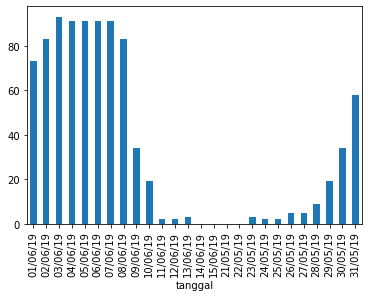

In [68]:
catlok.groupby("tanggal").sum("mudik").mudik.plot(kind="bar");